In [2]:
import zipfile

zip_ref = zipfile.ZipFile('pizza_steak (2).zip')
zip_ref.extractall()
zip_ref.close()

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path('p/content/pizza_steak/train')
data_dir

WindowsPath('p/content/pizza_steak/train')

In [4]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')

for item in data_dir.glob('*'):
  print(item,'       ', item.name)

pizza_steak\train\pizza         pizza
pizza_steak\train\steak         steak


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (384, 512, 3)


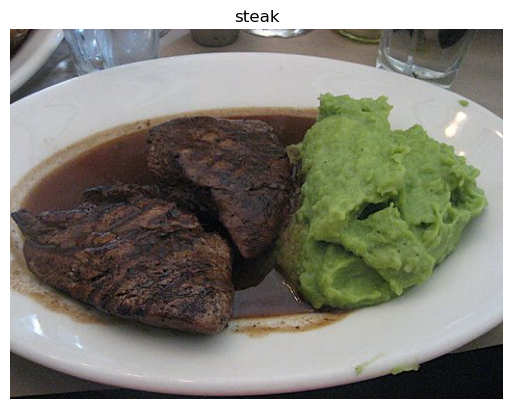

In [7]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'steak')

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data  = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size =3,
                          activation = 'relu',
                          strides = 1,
                           padding = 'same',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                             padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'linear')
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model_1.fit(train_data,epochs = 5,
                      validation_data = valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 824ms/step - accuracy: 0.5470 - loss: 0.6861 - val_accuracy: 0.8000 - val_loss: 0.4331
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 383ms/step - accuracy: 0.8017 - loss: 0.4266 - val_accuracy: 0.8080 - val_loss: 0.3852
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 380ms/step - accuracy: 0.8785 - loss: 0.3362 - val_accuracy: 0.7600 - val_loss: 0.4137
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 384ms/step - accuracy: 0.8911 - loss: 0.2389 - val_accuracy: 0.8420 - val_loss: 0.3374
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 391ms/step - accuracy: 0.9281 - loss: 0.1654 - val_accuracy: 0.8360 - val_loss: 0.3859


In [9]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 107, 107, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [10]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(4,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(4,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model_2.fit(train_data,epochs = 5,
                     validation_data = valid_data)

C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - accuracy: 0.4985 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 260ms/step - accuracy: 0.5188 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - accuracy: 0.4809 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.4744 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.4908 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [11]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,485 (6.89 MB)

 Trainable params: 602,161 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,324 (4.59 MB)

In [12]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100,activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model_3.fit(train_data,epochs = 5,
                     validation_data = valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.5939 - loss: 6.1236 - val_accuracy: 0.7500 - val_loss: 0.9482
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - accuracy: 0.7396 - loss: 0.9704 - val_accuracy: 0.7300 - val_loss: 1.3058
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.7275 - loss: 1.3516 - val_accuracy: 0.6440 - val_loss: 2.3821
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 294ms/step - accuracy: 0.7233 - loss: 1.4296 - val_accuracy: 0.8000 - val_loss: 0.6513
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 288ms/step - accuracy: 0.7383 - loss: 1.1242 - val_accuracy: 0.7720 - val_loss: 0.7394


In [13]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              batch_size = 32)
test_data = train_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_4 = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    Conv2D(filters = 100,
          kernel_size = 3,
          strides = 1,
          padding = 'valid',
          activation = 'relu'),
    Conv2D(100,3,activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(100,3,activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [17]:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

In [18]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 100)  │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 100)  │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1166400)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │     1,166,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,349,401 (5.15 MB)

 Trainable params: 1,349,401 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_4 = model_4.fit(train_data,epochs = 3,
                       validation_data = test_data)

Epoch 1/3
 7/47 ━━━━━━━━━━━━━━━━━━━━ 25:26 38s/step - accuracy: 0.5438 - loss: 3.8159

In [ ]:
model_4.evaluate(test_data)

In [ ]:
history_4.history

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figszie = (10,7))

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [ ]:
plot_loss_curves(history_4)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_5 = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    Conv2D(filters = 100,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu'),
    Conv2D(100,3, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    MaxPool2D(pool_size = 2),
    Conv2D(100,3,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [ ]:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = Adam(learning_rate = 0.0008),
              metrics = ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            validation_data = test_data)

In [ ]:
plot_loss_curves(history_5)

# Augamentation

In [ ]:
# Augamented dataset

train_datagen_augamented = ImageDataGenerator(rescale = 1/255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  heigth_shift_range = 0.2,
                                  horizontal_flip = True)
# Normal dataset
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
IMG_SIZE  = (224,224)
print("Train data augamented:")
train_data_augamented = train_datagen_augamented.flow_from_directory(directory = train_dir,
                                                                    target_szie = IMG_SIZE,
                                                                    class_mode = 'binary',
                                                                    batch_szie = 32,
                                                                    shuffle = False)
print("Non-augamented train data:")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_szie = IMG_SIZE,
                                               class_mode = 'binary',
                                               batch_szie = 32,
                                               shuffle = False)
print("Non-augamented test data:")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_szie = IMG_SIZE,
                                               class_mode = 'binary',
                                               batch_szie = 32,
                                               shuffle = False)